In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242810 entries, 0 to 1242809
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1242810 non-null  int64  
 1   kWh       1242810 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 19.0 MB


In [4]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1242805    0.15
1242806    0.15
1242807    0.15
1242808    0.15
1242809    0.15
Name: kWh, Length: 1242810, dtype: float64

In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1242805    0.15
1242806    0.15
1242807    0.15
1242808    0.15
1242809    0.15
Name: kWh, Length: 1242810, dtype: float64

In [6]:
l=len(conso_data)-1
l

1242809

In [7]:
conso_data['sec']=conso_data['Interval']/1000


In [8]:
conso_data['Wh']=3600000/conso_data['Interval']


In [9]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [10]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242810 entries, 0 to 1242809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1242810 non-null  int64  
 1   kWh        1242810 non-null  float64
 2   sec        1242810 non-null  float64
 3   Wh         1242810 non-null  float64
 4   cumul(ms)  1242810 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 47.4 MB


In [11]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1242805,23631,0.15,23.631,152.342262,29257959475
1242806,23895,0.15,23.895,150.659134,29257983370
1242807,24019,0.15,24.019,149.881344,29258007389
1242808,23832,0.15,23.832,151.057402,29258031221
1242809,23837,0.15,23.837,151.025716,29258055058


In [12]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

29258055058000

In [13]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 6, 10, 588349)

In [14]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [15]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [16]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [17]:
conso_data['dates']

0         2023-08-21 19:06:32.522349
1         2023-08-21 19:06:54.380349
2         2023-08-21 19:07:16.381349
3         2023-08-21 19:07:38.309349
4         2023-08-21 19:08:00.200349
                     ...            
1242805   2024-07-25 10:18:50.063349
1242806   2024-07-25 10:19:13.958349
1242807   2024-07-25 10:19:37.977349
1242808   2024-07-25 10:20:01.809349
1242809   2024-07-25 10:20:25.646349
Name: dates, Length: 1242810, dtype: datetime64[ns]

In [18]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:06:32.522349,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:06:54.380349,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:07:16.381349,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:07:38.309349,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:08:00.200349,21/08/23
...,...,...,...,...,...,...,...
1242805,23631,0.15,23.631,152.342262,29257959475,2024-07-25 10:18:50.063349,25/07/24
1242806,23895,0.15,23.895,150.659134,29257983370,2024-07-25 10:19:13.958349,25/07/24
1242807,24019,0.15,24.019,149.881344,29258007389,2024-07-25 10:19:37.977349,25/07/24
1242808,23832,0.15,23.832,151.057402,29258031221,2024-07-25 10:20:01.809349,25/07/24


In [19]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('25/07/24', 25, 7, 2024)

In [20]:
here = now.strftime('%H:%M:%S')
here

'10:20:44'

In [21]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [22]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 1241417 to 1242809
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1393 non-null   int64         
 1   kWh        1393 non-null   float64       
 2   sec        1393 non-null   float64       
 3   Wh         1393 non-null   float64       
 4   cumul(ms)  1393 non-null   int64         
 5   dates      1393 non-null   datetime64[ns]
 6   days       1393 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 87.1+ KB


In [23]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [24]:
data = list(df_grp['kWh'])
print(data)


[0.833, 3.7, 4.232, 3.68, 4.189, 4.609, 3.524, 3.408, 3.514, 3.696, 3.769, 3.792, 4.256, 3.807, 3.463, 3.639, 3.325, 3.374, 4.29, 4.005, 4.045, 3.923, 3.444, 4.455, 3.744, 3.76, 4.372, 4.68, 3.801, 3.223, 3.18, 4.001, 3.67, 3.167, 3.796, 4.148, 3.753, 3.572, 4.782, 4.187, 4.543, 3.774, 3.407, 4.306, 3.876, 3.864, 3.436, 4.081, 3.655, 3.399, 4.135, 3.382, 3.888, 3.837, 3.642, 3.75, 4.244, 3.304, 3.869, 2.98, 2.055, 2.041, 2.455, 4.088, 3.724, 4.331, 3.615, 3.92, 3.743, 3.922, 3.985, 4.113, 3.645, 3.159, 3.803, 3.511, 3.624, 3.709, 3.685, 3.238, 3.906, 3.217, 3.788, 3.607, 4.083, 3.607, 3.345, 3.816, 4.064, 4.359, 4.106, 3.998, 4.23, 3.749, 3.923, 3.864, 3.914, 3.743, 4.044, 4.346, 3.887, 3.503, 3.683, 3.673, 3.344, 3.847, 3.994, 4.104, 3.473, 4.176, 3.606, 4.079, 4.53, 3.684, 3.427, 3.581, 4.166, 3.693, 4.083, 3.981, 3.745, 3.591, 5.129, 3.698, 3.766, 4.293, 4.101, 4.718, 4.4, 3.981, 3.781, 4.361, 4.68, 4.2, 4.788, 4.319, 3.72, 4.182, 3.706, 3.634, 3.53, 3.948, 3.672, 3.786, 3.577, 3.49

In [25]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [26]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [27]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [28]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.306082
dtype: float64

In [29]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.655324
dtype: float64

In [30]:
last=df_grp.iloc[-1]['kWh']
last

1.393

In [31]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 1241417 to 1242809
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1393 non-null   int64         
 1   kWh        1393 non-null   float64       
 2   sec        1393 non-null   float64       
 3   Wh         1393 non-null   float64       
 4   cumul(ms)  1393 non-null   int64         
 5   dates      1393 non-null   datetime64[ns]
 6   days       1393 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 87.1+ KB


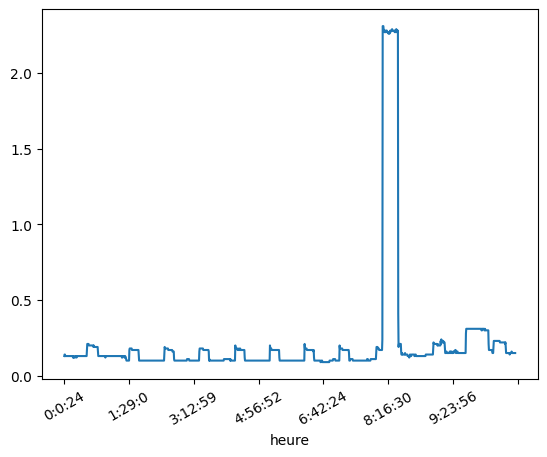

In [32]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [33]:
conso_day['heure']


1241417      0:0:24
1241418      0:0:50
1241419      0:1:16
1241420      0:1:42
1241421       0:2:9
             ...   
1242805    10:18:50
1242806    10:19:13
1242807    10:19:37
1242808     10:20:1
1242809    10:20:25
Name: heure, Length: 1393, dtype: object

In [34]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:24',
              days   kWh
  heure                 
  0:0:24  25/07/24  0.13),
 ('0:0:50',
              days   kWh
  heure                 
  0:0:50  25/07/24  0.14),
 ('0:1:16',
              days   kWh
  heure                 
  0:1:16  25/07/24  0.14),
 ('0:1:42',
              days   kWh
  heure                 
  0:1:42  25/07/24  0.13),
 ('0:2:9',
             days   kWh
  heure                
  0:2:9  25/07/24  0.13),
 ('0:2:36',
              days   kWh
  heure                 
  0:2:36  25/07/24  0.13),
 ('0:3:3',
             days   kWh
  heure                
  0:3:3  25/07/24  0.13),
 ('0:3:30',
              days   kWh
  heure                 
  0:3:30  25/07/24  0.13),
 ('0:3:57',
              days   kWh
  heure                 
  0:3:57  25/07/24  0.13),
 ('0:4:24',
              days   kWh
  heure                 
  0:4:24  25/07/24  0.13),
 ('0:4:52',
              days   kWh
  heure                 
  0:4:52  25/07/24  0.13),
 ('0:5:19',
              day

In [35]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:24',
  heure
  0:0:24    0.13
  Name: kWh, dtype: float64),
 ('0:0:50',
  heure
  0:0:50    0.14
  Name: kWh, dtype: float64),
 ('0:1:16',
  heure
  0:1:16    0.14
  Name: kWh, dtype: float64),
 ('0:1:42',
  heure
  0:1:42    0.13
  Name: kWh, dtype: float64),
 ('0:2:9',
  heure
  0:2:9    0.13
  Name: kWh, dtype: float64),
 ('0:2:36',
  heure
  0:2:36    0.13
  Name: kWh, dtype: float64),
 ('0:3:3',
  heure
  0:3:3    0.13
  Name: kWh, dtype: float64),
 ('0:3:30',
  heure
  0:3:30    0.13
  Name: kWh, dtype: float64),
 ('0:3:57',
  heure
  0:3:57    0.13
  Name: kWh, dtype: float64),
 ('0:4:24',
  heure
  0:4:24    0.13
  Name: kWh, dtype: float64),
 ('0:4:52',
  heure
  0:4:52    0.13
  Name: kWh, dtype: float64),
 ('0:5:19',
  heure
  0:5:19    0.13
  Name: kWh, dtype: float64),
 ('0:5:47',
  heure
  0:5:47    0.13
  Name: kWh, dtype: float64),
 ('0:6:14',
  heure
  0:6:14    0.13
  Name: kWh, dtype: float64),
 ('0:6:41',
  heure
  0:6:41    0.13
  Name: kWh, dtype: float64),

In [36]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:24,27264,0.13,27.264,132.042254,29220853788,2024-07-25 00:00:24.376349,25/07/24
0:0:50,25785,0.14,25.785,139.616056,29220879573,2024-07-25 00:00:50.161349,25/07/24
0:1:16,25898,0.14,25.898,139.006873,29220905471,2024-07-25 00:01:16.059349,25/07/24
0:1:42,26821,0.13,26.821,134.223183,29220932292,2024-07-25 00:01:42.880349,25/07/24
0:2:9,27049,0.13,27.049,133.091796,29220959341,2024-07-25 00:02:09.929349,25/07/24
...,...,...,...,...,...,...,...
10:18:50,23631,0.15,23.631,152.342262,29257959475,2024-07-25 10:18:50.063349,25/07/24
10:19:13,23895,0.15,23.895,150.659134,29257983370,2024-07-25 10:19:13.958349,25/07/24
10:19:37,24019,0.15,24.019,149.881344,29258007389,2024-07-25 10:19:37.977349,25/07/24


In [37]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [38]:
df.iloc[0].dates

Timestamp('2024-07-25 00:00:24.376349')

In [39]:
df.dates.dt.time

heure
0:0:24      00:00:24.376349
0:0:50      00:00:50.161349
0:1:16      00:01:16.059349
0:1:42      00:01:42.880349
0:2:9       00:02:09.929349
                 ...       
10:18:50    10:18:50.063349
10:19:13    10:19:13.958349
10:19:37    10:19:37.977349
10:20:1     10:20:01.809349
10:20:25    10:20:25.646349
Name: dates, Length: 1393, dtype: object

In [40]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [41]:
tranches = len(df)//1000
tranches+1

2

In [42]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-25 00:00:24.376349	2024-07-25 08:16:28.766349	8h 16m 4s 	1000
2024-07-25 08:16:28.766349	2024-07-25 10:20:25.646349	2h 3m 56s 	393


In [43]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:20:44', 1.393, 1393)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0:0:24 to 10:20:25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1393 non-null   int64         
 1   kWh        1393 non-null   float64       
 2   sec        1393 non-null   float64       
 3   Wh         1393 non-null   float64       
 4   cumul(ms)  1393 non-null   int64         
 5   dates      1393 non-null   datetime64[ns]
 6   days       1393 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 119.4+ KB


In [45]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [46]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 21/08/23 to 25/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     340 non-null    float64
dtypes: float64(1)
memory usage: 5.3+ KB


In [47]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [48]:
df_grp.tail(7)

,kWh
days,
19/07/24,3.444
20/07/24,3.390
21/07/24,3.687
22/07/24,3.675
23/07/24,3.564
24/07/24,3.600
25/07/24,1.393


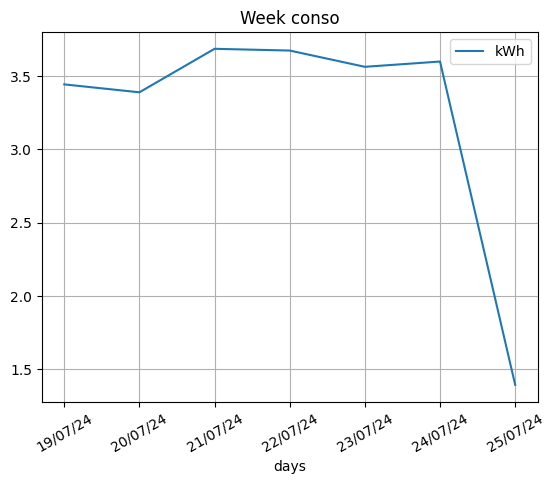

In [49]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [50]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [51]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


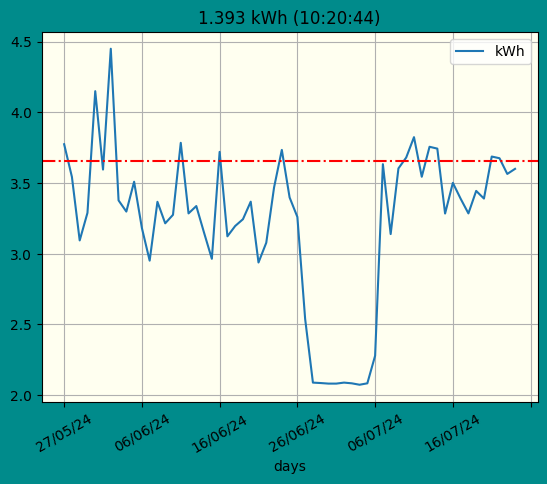

In [52]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [53]:
df_grp.mean()

kWh    3.655324
dtype: float64

In [54]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
12/07/24,3.544
13/07/24,3.756
14/07/24,3.743
15/07/24,3.284
16/07/24,3.501
17/07/24,3.389
18/07/24,3.285
19/07/24,3.444
20/07/24,3.390


In [55]:
df_grp

,kWh
days,
21/08/23,0.833
22/08/23,3.700
23/08/23,4.232
24/08/23,3.680
25/08/23,4.189
...,...
21/07/24,3.687
22/07/24,3.675
23/07/24,3.564


In [56]:
df_grp.tail(100).mean()

kWh    3.3615
dtype: float64

<Axes: xlabel='days'>

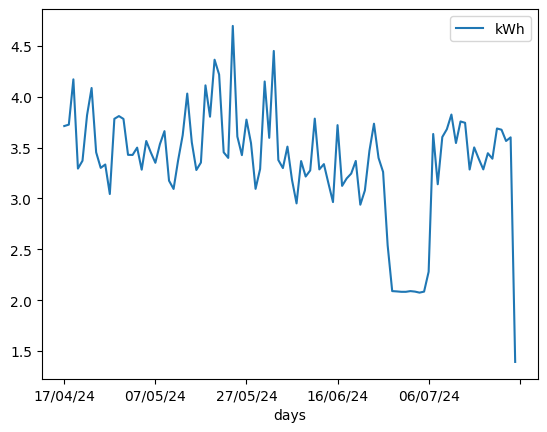

In [57]:
df_grp.tail(100).plot()

In [58]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.062900
std,0.680253
min,2.074000
25%,2.136500
50%,3.389500
75%,3.602250
max,3.824000


In [59]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/07/24 3.824
04/07/24 2.074


In [60]:
day

'25/07/24'

In [61]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1241417,27264,0.13,27.264,132.042254,29220853788,2024-07-25 00:00:24.376349,25/07/24,0:0:24
1241418,25785,0.14,25.785,139.616056,29220879573,2024-07-25 00:00:50.161349,25/07/24,0:0:50
1241419,25898,0.14,25.898,139.006873,29220905471,2024-07-25 00:01:16.059349,25/07/24,0:1:16
1241420,26821,0.13,26.821,134.223183,29220932292,2024-07-25 00:01:42.880349,25/07/24,0:1:42
1241421,27049,0.13,27.049,133.091796,29220959341,2024-07-25 00:02:09.929349,25/07/24,0:2:9
...,...,...,...,...,...,...,...,...
1242805,23631,0.15,23.631,152.342262,29257959475,2024-07-25 10:18:50.063349,25/07/24,10:18:50
1242806,23895,0.15,23.895,150.659134,29257983370,2024-07-25 10:19:13.958349,25/07/24,10:19:13
1242807,24019,0.15,24.019,149.881344,29258007389,2024-07-25 10:19:37.977349,25/07/24,10:19:37
1242808,23832,0.15,23.832,151.057402,29258031221,2024-07-25 10:20:01.809349,25/07/24,10:20:1


In [62]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 1241417 to 1242809
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1393 non-null   int64         
 1   kWh        1393 non-null   float64       
 2   sec        1393 non-null   float64       
 3   Wh         1393 non-null   float64       
 4   cumul(ms)  1393 non-null   int64         
 5   dates      1393 non-null   datetime64[ns]
 6   days       1393 non-null   object        
 7   heure      1393 non-null   object        
 8   hours      1393 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 108.8+ KB


In [63]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1241417    00  0.13
  1241418    00  0.14
  1241419    00  0.14
  1241420    00  0.13
  1241421    00  0.13
  ...       ...   ...
  1241553    00  0.13
  1241554    00  0.13
  1241555    00  0.13
  1241556    00  0.13
  1241557    00  0.13
  
  [141 rows x 2 columns]),
 ('01',
          hours   kWh
  1241558    01  0.13
  1241559    01  0.13
  1241560    01  0.13
  1241561    01  0.13
  1241562    01  0.13
  ...       ...   ...
  1241677    01  0.10
  1241678    01  0.10
  1241679    01  0.10
  1241680    01  0.10
  1241681    01  0.10
  
  [124 rows x 2 columns]),
 ('02',
          hours  kWh
  1241682    02  0.1
  1241683    02  0.1
  1241684    02  0.1
  1241685    02  0.1
  1241686    02  0.1
  ...       ...  ...
  1241790    02  0.1
  1241791    02  0.1
  1241792    02  0.1
  1241793    02  0.1
  1241794    02  0.1
  
  [113 rows x 2 columns]),
 ('03',
          hours   kWh
  1241795    03  0.10
  1241796    03  0.11
  1241797    03  0.11
  1241798 

In [64]:
groupedbyhour.count()

,kWh
hours,
00,141
01,124
02,113
03,114
04,114
05,112
06,111
07,117
08,184


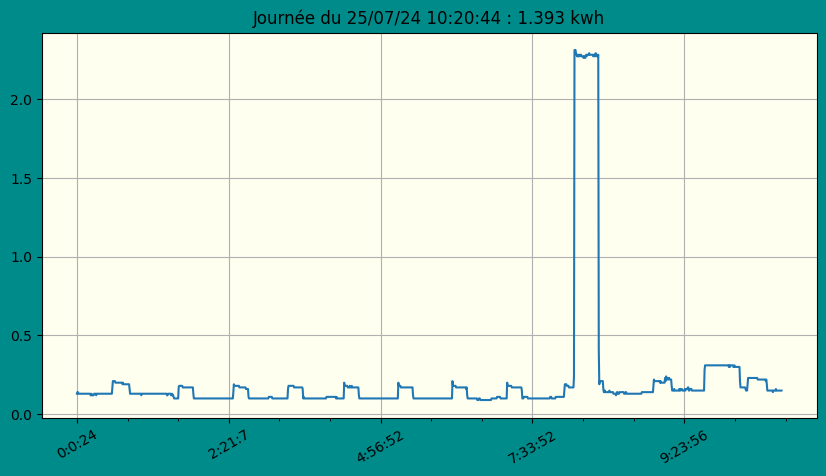

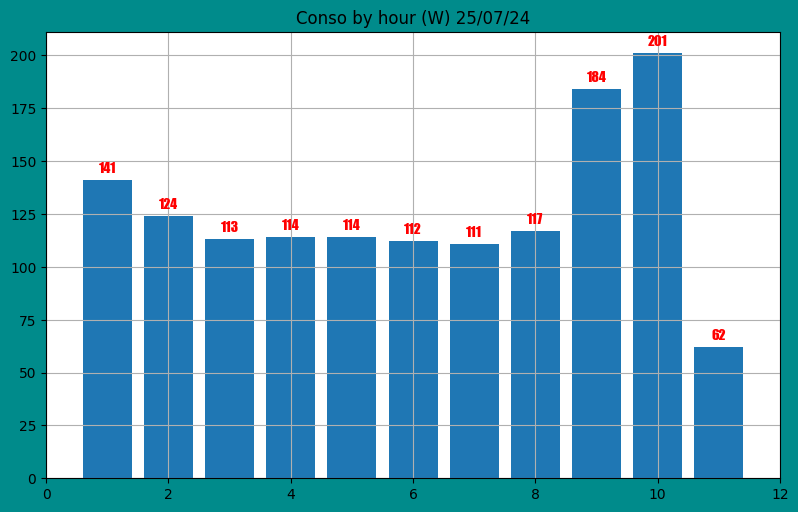

In [65]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [66]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [67]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [68]:
#conso_byhour(day)

In [69]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

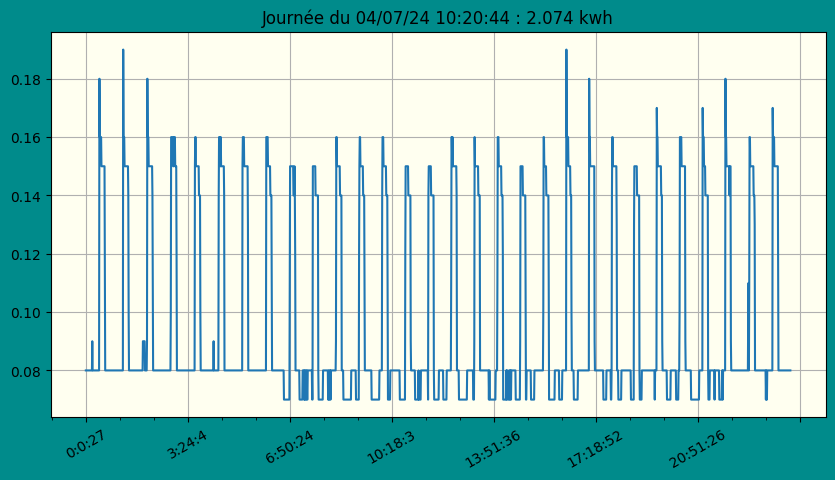

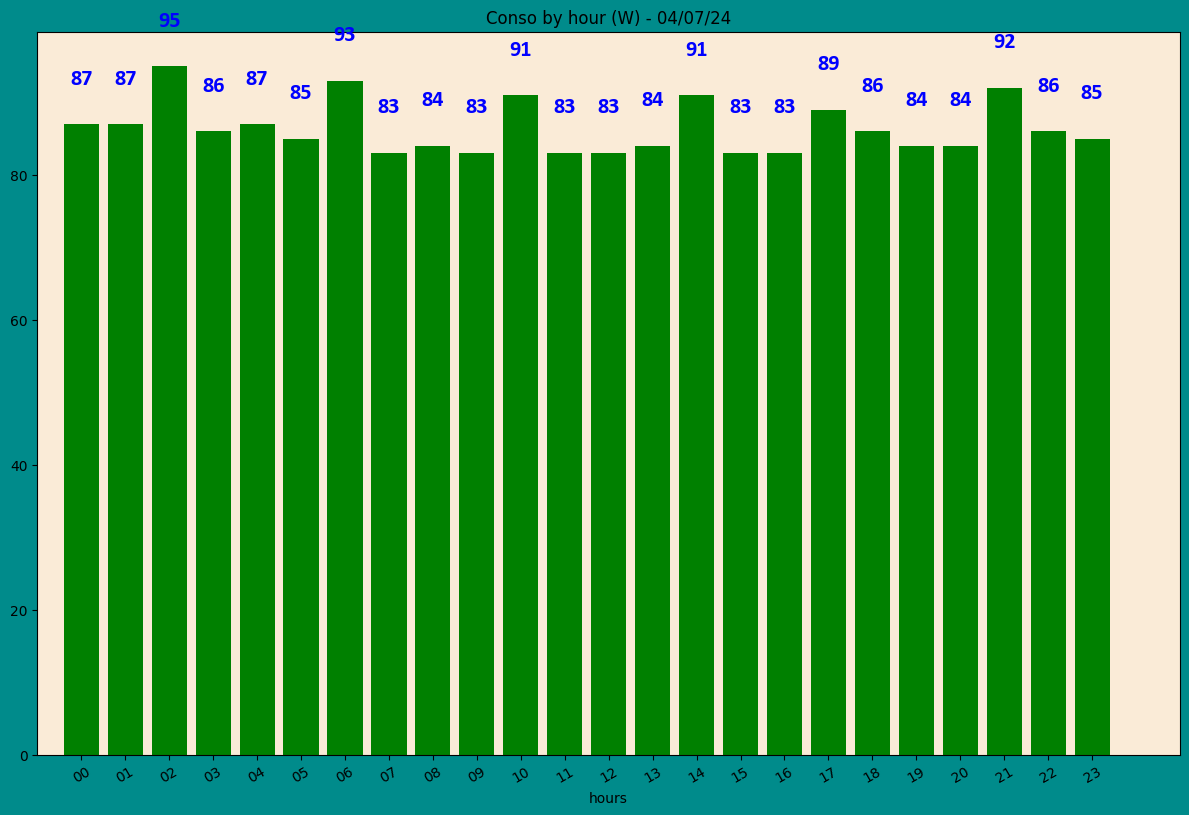

In [70]:
# plot any day
day = '04/07/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [71]:
month

days
25/06/24    3.398
26/06/24    3.260
27/06/24    2.539
28/06/24    2.089
29/06/24    2.086
30/06/24    2.082
01/07/24    2.082
02/07/24    2.089
03/07/24    2.084
04/07/24    2.074
05/07/24    2.084
06/07/24    2.279
07/07/24    3.633
08/07/24    3.139
09/07/24    3.603
10/07/24    3.680
11/07/24    3.824
12/07/24    3.544
13/07/24    3.756
14/07/24    3.743
15/07/24    3.284
16/07/24    3.501
17/07/24    3.389
18/07/24    3.285
19/07/24    3.444
20/07/24    3.390
21/07/24    3.687
22/07/24    3.675
23/07/24    3.564
24/07/24    3.600
Name: kWh, dtype: float64

In [72]:
month.idxmax()

'11/07/24'

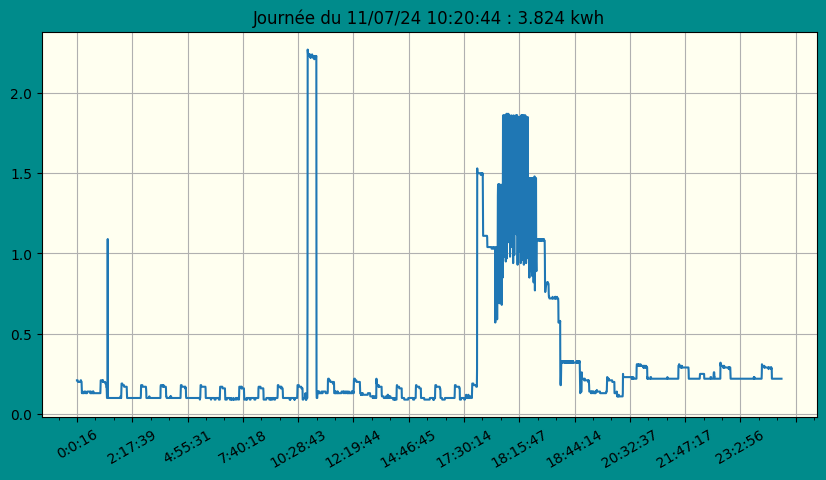

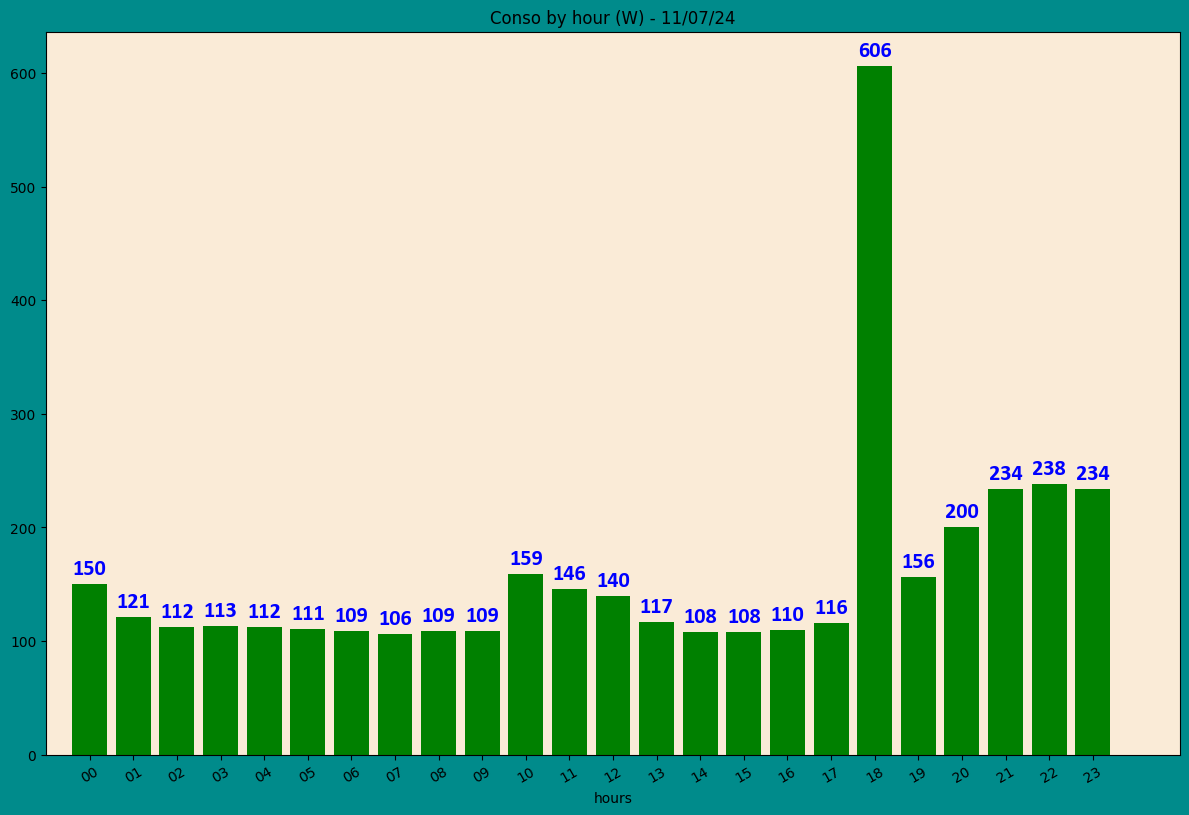

In [73]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [74]:
filename='conso_data.csv'
#conso_data.to_csv(filename)